This notebook gives a quick overview of how to simulate spectra and light curves from the BayeSN model. These light curve simulations will be much cruder than those possible with SNANA and are intended more for exploratory model analysis than for realistic simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bayesn import SEDmodel

**Start by simulating spectra**

Import SEDmodel class from bayesn_model, using the M20 model. This notebook assumes you have access to the bayesn-filter folder which can be downloaded through the Github page, or have made your own set of filters. Make sure you set ``filter_yaml`` to the location of your `filters.yaml` file.

In [2]:
model = SEDmodel(load_model='M20_model', filter_yaml='PATH/TO/filters.yaml')

Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /Users/matt/PycharmProjects/SNPyro
Loading built-in model M20_model


Simulate a spectral time series from the BayeSN model every 5 days between -10 and 40 rest-frame days at z=0.3. You can set parameter values using e.g. theta=1, AV=0.3, if not specified they are all randomly sampled from the model priors.

In [3]:
ts = np.arange(-10, 40, 5)
sim = model.simulate_spectrum(ts, 100, z=0.3, mu='z')
l, spec, params = sim

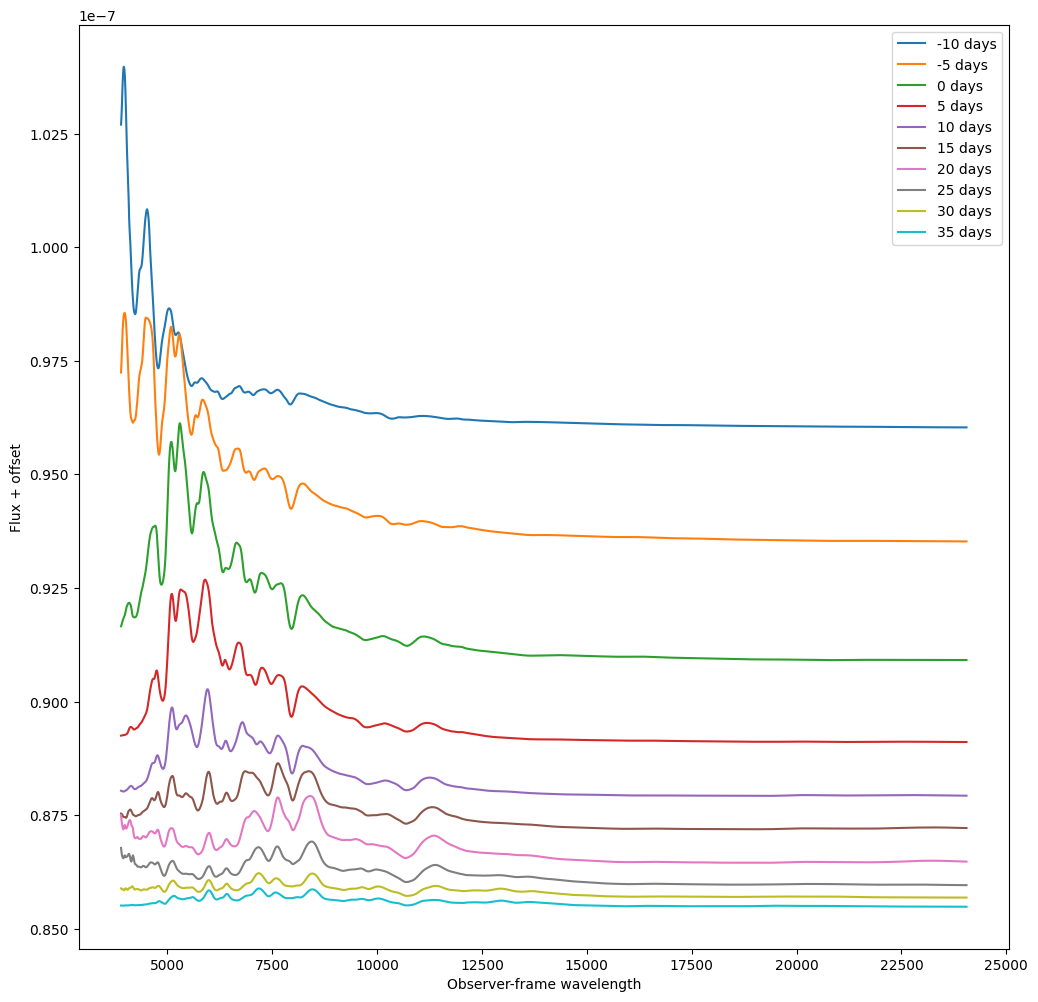

In [4]:
plt.figure(figsize=(12, 12))
offset = 1e-7
for i, t in enumerate(ts):
    offset -= spec[0, :, i].max() * 0.5
    plt.plot(l[0, :], spec[0, :, i] + offset, label=f'{t} days')
plt.xlabel('Observer-frame wavelength')
plt.ylabel('Flux + offset')
plt.legend()
plt.show()

**Now try simulating light curves**

Simulate 100 BVriYJH CSP light curves at regular phases. As for the spectroscopic simulations, if you do not specify parameters the model will draw samples from the priors.

In [5]:
model = SEDmodel(load_model='M20_model', filter_yaml='PATH/TO/filters.yaml')

Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /Users/matt/PycharmProjects/SNPyro
Loading built-in model M20_model


In [6]:
N = 100
t = np.arange(-8, 40, 4)
bands = ['B_CSP', 'V_CSP', 'r_CSP', 'i_CSP', 'Y_RC', 'J_RC1', 'H_RC']
sim = model.simulate_light_curve(t, N, bands, yerr=0.05, z=np.random.uniform(0, 0.1, N), mu='z', write_to_files=False)

Plot first simulated light curve

NameError: name 'mag' is not defined

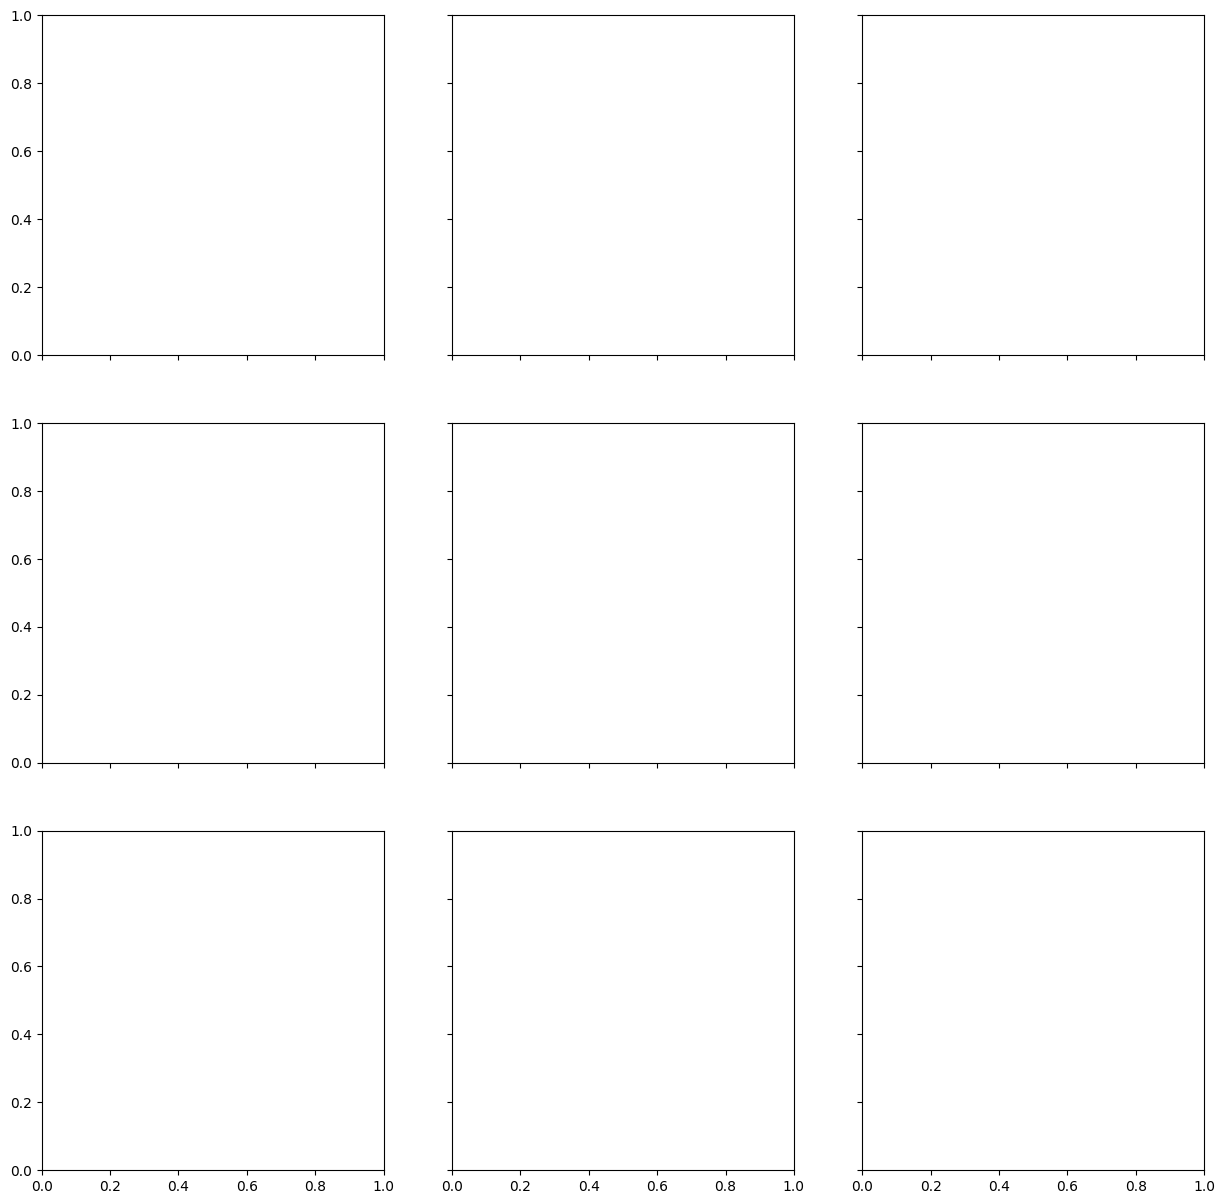

In [7]:
num_per_band = len(t)

fig, axs = plt.subplots(3, 3, sharex=True, sharey='row', figsize=(15, 15))
for i, band in enumerate(bands):
    ax = axs.flatten()[i]
    ax.errorbar(t, mag[i * num_per_band: (i + 1) * num_per_band, 0], 
                mag_err[i * num_per_band: (i + 1) * num_per_band, 0], fmt='x')
    ax.set_title(rf'{band}'.replace('_', '-'))
    ax.invert_yaxis()
fig.supxlabel('Rest-frame Phase')
fig.supylabel('Apparent magnitude')
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()